In [2]:
import json

file = "id909"

json_open = open(file + '.json', 'r', encoding="utf-8")
json_load = json.load(json_open)

print(json_load)

d = json_load
print(d.keys())

{'url': '', 'tree_id': 909, 'u': 'https://www.dfrome.com/select?id=909', 'memo': '理工系進学女性を増やす\n森原ブリッジ', 'refs': '', 'bookmark': False, 'username': 'soph', 'name': 'Women Scientist/Engineer #minority #phasex', 'data': {'arrows': {'hasReason': [], 'hasEffect': [], 'hasArtifactsOnly': [{'refs': '', 'url': '', 'd2': {'width': 270, 'listId': 1, 'stageX': 1455.999986770391, 'stageY': 489.9994682359754}, 'memo': '', 'i2': 3, 'd1': {'width': 102, 'listId': 1, 'stageX': 1638.9999806988315, 'stageY': 744.0004873461471}, 'visible': True, 'id': 1, 'i1': 5}, {'refs': '', 'url': '', 'd2': {'width': 348, 'listId': 1, 'stageX': 1147.0000366210913, 'stageY': 437.9992953344661}, 'memo': '', 'i2': 11, 'd1': {'width': 270, 'listId': 1, 'stageX': 1455.999986770391, 'stageY': 489.9994682359754}, 'visible': True, 'id': 2, 'i1': 3}, {'refs': '', 'url': '', 'd2': {'width': 272, 'listId': 1, 'stageX': 1448, 'stageY': 247.999495606143}, 'memo': '', 'i2': 10, 'd1': {'width': 224, 'listId': 1, 'stageX': 1290.99999

In [3]:
# ノード情報

nodes = d["data"]["items"]["artifacts"]
nodes[1]

{'width': 270,
 'fT': 'the number of women in science and engineering',
 'url': '',
 'pos': {'x': 491.99998677039093, 'y': 436.9994682359754},
 'memo': '',
 'refs': '',
 'sT': 'Increase',
 'visible': True,
 'id': 3}

In [4]:
# エッジ情報

arr = d["data"]["arrows"]["hasArtifactsOnly"]
arr[1]

{'refs': '',
 'url': '',
 'd2': {'width': 348,
  'listId': 1,
  'stageX': 1147.0000366210913,
  'stageY': 437.9992953344661},
 'memo': '',
 'i2': 11,
 'd1': {'width': 270,
  'listId': 1,
  'stageX': 1455.999986770391,
  'stageY': 489.9994682359754},
 'visible': True,
 'id': 2,
 'i1': 3}

#### データフレームに格納して３次元の可視化

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# import japanize_matplotlib

In [6]:
pointx = nodes[1]['pos']['x']
pointy = nodes[1]['pos']['y']
print(pointx, pointy)

491.99998677039093 436.9994682359754


In [7]:
lst = [[nodes[i]['id'], nodes[i]['fT'], nodes[i]['sT'], nodes[i]['pos']['x'], -nodes[i]['pos']['y']] for i in range(len(nodes))]
lst[:2]
df = pd.DataFrame(lst, columns =['id', 'fT', 'sT', 'x', 'y']) 
df.head()

,id,fT,sT,x,y
0,2,Being a science and engineering woman,become normal,327.000000,-310.999631
1,3,the number of women in science and engineering,Increase,491.999987,-436.999468
2,4,Science and engineering women,become major,630.000004,-321.999160
3,5,NPO organization,be established,674.999981,-691.000487
4,9,The Society,become diverse,471.000000,-22.000000


In [8]:
lst = [[nodes[i]['id'], nodes[i]['fT'], nodes[i]['sT'], nodes[i]['pos']['y'], nodes[i]['pos']['x']] for i in range(len(nodes))]
lst[:2]
df = pd.DataFrame(lst, columns =['id', 'fT', 'sT', 'x', 'y']) 
df.head()

,id,fT,sT,x,y
0,2,Being a science and engineering woman,become normal,310.999631,327.000000
1,3,the number of women in science and engineering,Increase,436.999468,491.999987
2,4,Science and engineering women,become major,321.999160,630.000004
3,5,NPO organization,be established,691.000487,674.999981
4,9,The Society,become diverse,22.000000,471.000000


In [9]:
num = np.random.randint(1, 100, len(df))
print(num)
# print(num[0], len(num[0]))
df["num"] = num
df.head()

[19 57 28 26 50 56 70 36 42 69 45 20 98 55 88 71 26 20 46 93 51 48 13 14
 46 51 99]


,id,fT,sT,x,y,num
0,2,Being a science and engineering woman,become normal,310.999631,327.000000,19
1,3,the number of women in science and engineering,Increase,436.999468,491.999987,57
2,4,Science and engineering women,become major,321.999160,630.000004,28
3,5,NPO organization,be established,691.000487,674.999981,26
4,9,The Society,become diverse,22.000000,471.000000,50


In [10]:
N = df["num"].sum()
print(N)
df["pot"] = -np.log(df["num"]/N)
df.head()
# df["pot"].describe()

1337


,id,fT,sT,x,y,num,pot
0,2,Being a science and engineering woman,become normal,310.999631,327.000000,19,4.253745
1,3,the number of women in science and engineering,Increase,436.999468,491.999987,57,3.155132
2,4,Science and engineering women,become major,321.999160,630.000004,28,3.865979
3,5,NPO organization,be established,691.000487,674.999981,26,3.940087
4,9,The Society,become diverse,22.000000,471.000000,50,3.286161


In [11]:
df["x"].describe()

count     27.000000
mean     500.963169
std      270.014491
min       22.000000
25%      288.499832
50%      534.000678
75%      726.000125
max      936.001755
Name: x, dtype: float64

In [12]:
df["y"].describe()

count      27.000000
mean      821.222223
std       423.323871
min       183.000037
25%       487.999993
50%       692.000000
75%      1296.499992
max      1626.000000
Name: y, dtype: float64

##### データ点補完の例

[[ 5.23        4.16843311  3.1348487  ... 24.67537773 17.61153151
  10.15      ]
 [ 5.67190132  4.66105918  3.64106386 ... 24.20061302 17.16314894
   9.77676644]
 [ 6.08172205  5.18332326  4.17668475 ... 23.71370978 16.70037816
   9.42668262]
 ...
 [ 2.15747734  4.46275138  6.74538346 ... 18.13810615 13.9717346
   9.81261264]
 [ 1.81407284  4.13038185  6.40608865 ... 18.3768097  14.18240469
  10.00606518]
 [ 1.47        3.77932217  6.04583003 ... 18.63022192 14.40468979
  10.2       ]]


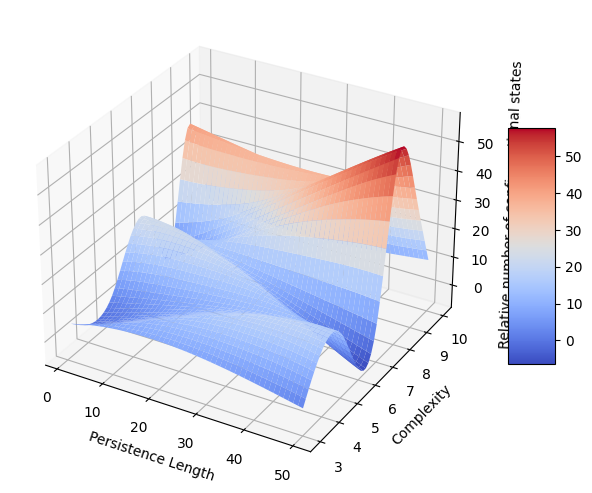

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.interpolate import griddata

X = [1,1,1,1,1,1,50,50,50,50,50,50]

Y = [3,5,7,8,9,10,3,5,7,8,9,10]

Z = [5.23,3.11,17.54,0.93,40.11,10.15,1.47,14.32,5.46,55.93,40.8,10.2]

points = np.array([X, Y]).T

# create a grid of coordinates between the minimum and
# maximum of your X and Y. 50j indicates 50 discretization
# points between the minimum and maximum.
X_grid, Y_grid = np.mgrid[1:50:50j, 3:10:50j]
# interpolate your values on the grid defined above
Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')
print(Z_grid)

fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Persistence Length')
ax.set_ylabel('Complexity')
ax.set_zlabel('Relative number of configurational states')

surf = ax.plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

1000


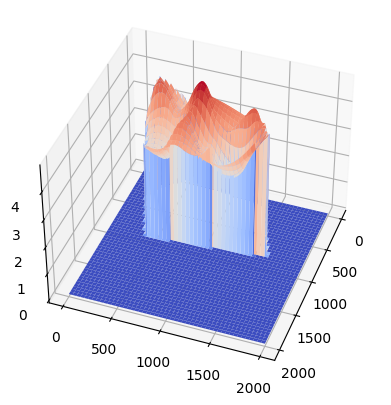

In [14]:
# 参考：　https://stackoverflow.com/questions/72008631/matplotlib-smoothing-3d-surface-data

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.cm as cm

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = df["x"].to_list(), df["y"].to_list(), df["pot"].to_list()

# print(X[:10], Y[:10], Z[:10])

points = np.array([X, Y]).T
# print(points)

# plt.subplot(221)
# plt.plot(points[:,0], points[:,1], 'k.', ms=1)
# plt.title('Original')

# create a grid of coordinates between the minimum and
# maximum of your X and Y. 50j indicates 50 discretization
# points between the minimum and maximum.
X_grid, Y_grid = np.mgrid[1:2000:1000j, 1:2000:1000j]

# plt.subplot(222)
# plt.plot(X_grid, Y_grid, 'k.', ms=1)

# interpolate your values on the grid defined above
Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')
print(len(Z_grid))

Z_d = np.nan_to_num(Z_grid)

# print(Z_d[0])

ax.plot_surface(X_grid, Y_grid, Z_d, cmap=cm.coolwarm, 
                       linewidth=1, antialiased=True)

ax.view_init(elev=40, azim=20, roll=0)

plt.show()

# まとめて可視化

In [15]:
rels = []

for i in range(len(arr)):
  rels.append([arr[i]["i1"], arr[i]["i2"]])

{2: array([ 327.     , -310.99963], dtype=float32), 3: array([ 492.     , -436.99948], dtype=float32), 4: array([ 630.     , -321.99915], dtype=float32), 5: array([ 675.    , -691.0005], dtype=float32), 9: array([471., -22.], dtype=float32), 10: array([ 484.    , -194.9995], dtype=float32), 11: array([ 183.00003, -384.9993 ], dtype=float32), 12: array([ 791.    , -194.9994], dtype=float32), 13: array([ 381.    , -936.0018], dtype=float32), 14: array([ 538.     , -829.00085], dtype=float32), 15: array([ 567.     , -929.00195], dtype=float32), 17: array([ 274.     , -198.99985], dtype=float32), 18: array([692.     , -76.99995], dtype=float32), 20: array([1391.    , -644.0007], dtype=float32), 21: array([ 409.00003, -760.99976], dtype=float32), 24: array([1343.     , -122.99988], dtype=float32), 26: array([1488.    , -551.9999], dtype=float32), 27: array([1314.     , -437.00012], dtype=float32), 28: array([1344.     , -266.00003], dtype=float32), 29: array([1279.     , -567.00116], dtype=

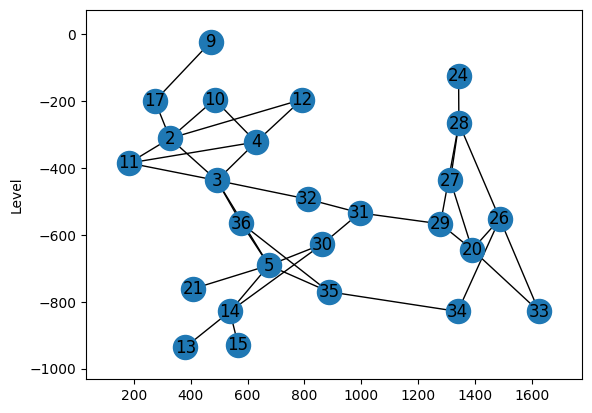

In [16]:
G = nx.Graph()
G.add_edges_from(rels)
pos = {df["id"][i] : np.array([df["y"][i], -df["x"][i]], dtype=np.float32) for i in range(len(df))}
print(pos)
# coords = np.array(list(pos.values()))
# print(coords, type(coords))

fig, ax = plt.subplots()
plt.subplot(111)
nx.draw_networkx(G, pos, with_labels=True)
plt.axis('on'); plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True) #force axis to turn on

ax.set_ylabel('Level')

plt.show()

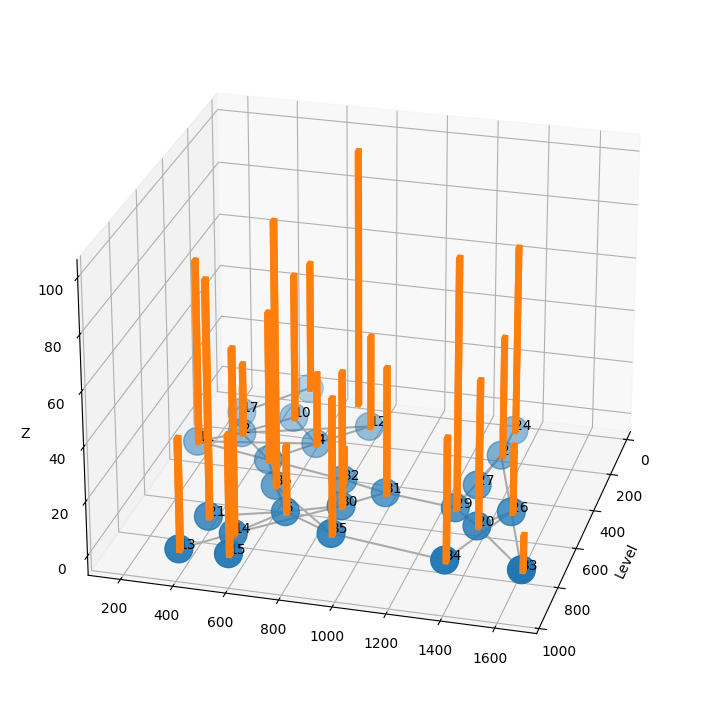

In [17]:
pos = {df["id"][i] : np.array([df["x"][i], df["y"][i], 0], dtype=np.float32) for i in range(len(df))}
# print(pos)
pos_ary = np.array([pos[n] for n in G])
# print(pos_ary)

# set up the figure and axes
fig = plt.figure(figsize=(10, 20))
ax2 = fig.add_subplot(211, projection='3d')

ax2.scatter(
    pos_ary[:, 0],
    pos_ary[:, 1],
    pos_ary[:, 2],
    s=400,
)

# ノードにラベルを表示する
for n in G.nodes:
    ax2.text(*pos[n], n)

# エッジの表示
for e in G.edges:
    node0_pos = pos[e[0]]
    node1_pos = pos[e[1]]
    xx = [node0_pos[0], node1_pos[0]]
    yy = [node0_pos[1], node1_pos[1]]
    zz = [node0_pos[2], node1_pos[2]]
    ax2.plot(xx, yy, zz, c="#aaaaaa")

# bar graph code
x, y, z = df["x"], df["y"], df["num"]
# print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 20
depth = 20
ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
# ax2.set_title('支持者数')
ax2.view_init(elev= 25, azim=15, roll=0)

ax2.set_xlabel('Level')
# ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z')

plt.show()

100


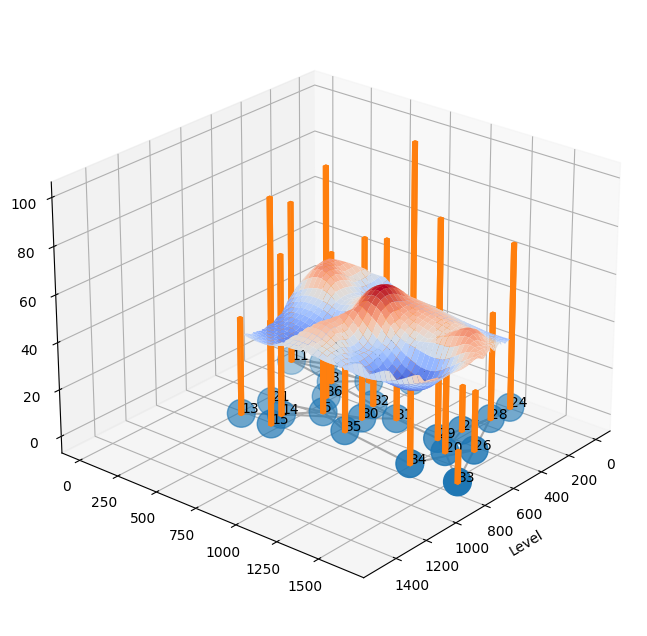

In [20]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

G = nx.Graph()
G.add_edges_from(rels)

pos = {df["id"][i] : np.array([df["x"][i], df["y"][i], 0], dtype=np.float32) for i in range(len(df))}
# print(pos)
pos_ary = np.array([pos[n] for n in G])
# print(pos_ary)

# set up the figure and axes
fig = plt.figure(figsize=(8, 8))
ax2 = fig.add_subplot(111, projection='3d')

ax2.scatter(
    pos_ary[:, 0],
    pos_ary[:, 1],
    pos_ary[:, 2],
    s=400,
)

# ノードにラベルを表示する
for n in G.nodes:
    ax2.text(*pos[n], n)

# エッジの表示
for e in G.edges:
    node0_pos = pos[e[0]]
    node1_pos = pos[e[1]]
    xx = [node0_pos[0], node1_pos[0]]
    yy = [node0_pos[1], node1_pos[1]]
    zz = [node0_pos[2], node1_pos[2]]
    ax2.plot(xx, yy, zz, c="#aaaaaa")

# bar graph code
x, y, z = df["x"], df["y"], df["num"]
# print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 20
depth = 20
ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
# ax2.set_title('支持者数')

# surface plot code
X, Y, Z = df["x"], df["y"], 10*df["pot"]

points = np.array([X, Y]).T

# create a grid of coordinates between the minimum and
# maximum of your X and Y. 50j indicates 50 discretization
# points between the minimum and maximum.
X_grid, Y_grid = np.mgrid[1:1500:100j, 1:1500:100j]
# interpolate your values on the grid defined above
Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

ax2.plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=True)

ax2.view_init(elev= 25, azim=40, roll=0)

ax2.set_xlabel('Level')
# ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z')

plt.savefig("3d_vis_%s_pot.png" % file)
plt.show()